## PCA analysis

Let us know focus on the Principal Component Analysis problem, that is,

$\underset{w}{max} ~ w^TAw$ subject to $w^Tw = 1$, i.e. if w=(x,y), then $x^2+y^2=1$

where A is the covariance matrix of the considered data.

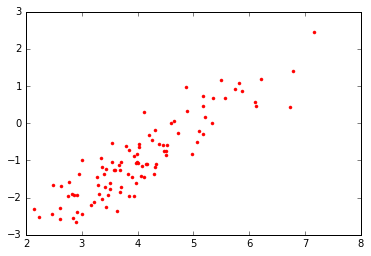

In [6]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

m1 = [4.,-1.]                                    #  mean
s1 = [[1,0.9],[0.9,1]]                           #  cov
c1 = np.random.multivariate_normal(m1,s1,100)    #  multivariate_normal(mean, cov[, size])
plt.plot(c1[:,0],c1[:,1],'r.')


1 [-0.70123854 -0.71292672]


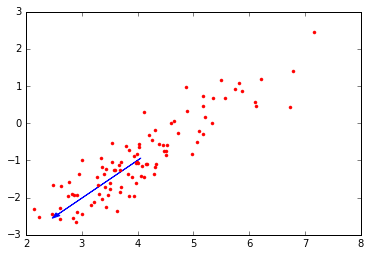

In [11]:
# Analytical solution

vaps,veps = np.linalg.eig(np.cov(c1.T))
idx = np.argmax(vaps)

print idx, veps[:,idx]

plt.plot(c1[:,0],c1[:,1],'r.')
plt.arrow(np.mean(c1[:,0]),np.mean(c1[:,1]),        # arrow(x, y, dx, dy, **kwargs)
          vaps[idx]*veps[0,idx],vaps[idx]*veps[1,idx],0.5,
          linewidth=1,head_width=0.1,color='blue')


In [12]:
def wtw(w,A):
    return np.dot(w.T,w)

def wtAw(w,A):
    return np.dot(w.T, np.dot(A,w))


# Projection method

In [13]:
import numpy as np

tol=1e-8
alpha=1.0
A = np.cov(c1.T)

w0 = np.array([1,3])
w=w0
w = w0 / np.sqrt(wtw(w,A)) # Projection of (x,y) over the cicle.
lam = wtAw(w,A)/wtw(w,A)  # lambda that minimizes the modulus of the gradient of the Lagrangian

cicle = wtw(w,A) - 1
f= -wtAw(w,A) + lam * cicle

cont=0
print "Initial values:"
print "  Function value =", f, " (x, y) =", w0

aux = np.zeros(2)

while ((alpha > tol) and (cont < 100000)):
    cont=cont+1
    
    # Gradient of the Lagrangian
    gr = np.dot(-A - A.T + 2*lam *(np.eye(2)),w)
    
    finished = 0
    while ((finished == 0) and (alpha > tol)):
        
        aux_w = w - alpha * gr
        aux_w= aux_w / np.sqrt(wtw(aux_w,A))    # projection
        
        cicle = wtw(aux_w,A) - 1
        aux_lam = wtAw(aux_w,A)/wtw(aux_w,A)
        aux_f= -wtAw(aux_w,A) + lam * cicle
        
        # Check if this is a descent
        if aux_f<f:
            w = aux_w
            lam=aux_lam
            f=aux_f
            alpha=1.0
            finished = 1
        else:
            alpha=alpha/2.0
            
print "\nFinal values:"
print "  Number of iterations", cont
print "  Function value ", f
print "  Obtained values are (x,y)=", w, "\n  lambda =", lam, "\n  alpha",alpha

Initial values:
  Function value = -1.73122267669  (x, y) = [1 3]

Final values:
  Number of iterations 2979
  Function value  -2.11884795916
  Obtained values are (x,y)= [ 0.70123854  0.71292672] 
  lambda = 2.11884795916 
  alpha 7.45058059692e-09


# Penalization method


In [11]:

c = 20000.0  # Penalty
tol=1e-8
alpha=0.50
A = np.cov(c1.T)

w = np.array([1,3])   # Initial values

cicle = wtw(w,A) - 1
g = (min(0,cicle))**2

f= -wtAw(w,A) + (c/2.)* cicle**2
cont=0
print "Initial values:"
print "  Function value =", f, " (x, y) =", w
while ((alpha > tol) and (cont < 10000)):
    print cicle
    cont=cont+1
    gr = np.dot(-A - A.T + 2*c*cicle*(np.eye(2)),w)
    
    # Normalization of the gradient. Just to avoid "jumping" too
    # far away with the line search
    modulus2 = gr[0]**2.0 + gr[1]**2.0
    modulus  = np.sqrt(modulus2)
    gr = gr/ modulus
    print gr, w
    
    finished = 0
    while ((finished == 0) and (alpha > tol)):
        
        aux_w = w-alpha*gr
        cicle = wtw(aux_w,A) - 1
        g = (min(0,cicle))**2
        aux_f= -wtAw(aux_w,A) + (c/2.)*g

        # Check if this is a descent
        if aux_f<f:
            w=aux_w
            f=aux_f
            alpha=1.0
            finished = 1
        else:
            alpha=alpha/2.0

print "Alpha", alpha
            
print "\nFinished values:"
print "  Number of iterations", cont
print "  Function value ", f
print "  Obtained values are (x,y)=", w,  "\n  alpha",alpha

Initial values:
  Function value = -12.00756355  (x, y) = [1 3]
9
[ 0.31622511  0.94868418] [1 3]
Alpha 7.45058059692e-09

Finished values:
  Number of iterations 1
  Function value  -12.00756355
  Obtained values are (x,y)= [1 3] 
  alpha 7.45058059692e-09


In [11]:

c = 20000.0  # Penalty
tol=1e-8
alpha=0.50
A = np.cov(c1.T)

w = np.array([1,3])   # Initial values

cicle = wtw(w,A) - 1
g = (min(0,cicle))**2

f= -wtAw(w,A) + (c/2.)* cicle**2
cont=0
print "Initial values:"
print "  Function value =", f, " (x, y) =", w
while ((alpha > tol) and (cont < 10000)):
    print cicle
    cont=cont+1
    gr = np.dot(-A - A.T + 2*c*cicle*(np.eye(2)),w)
    
    # Normalization of the gradient. Just to avoid "jumping" too
    # far away with the line search
    modulus2 = gr[0]**2.0 + gr[1]**2.0
    modulus  = np.sqrt(modulus2)
    gr = gr/ modulus
    print gr, w
    
    finished = 0
    while ((finished == 0) and (alpha > tol)):
        
        aux_w = w-alpha*gr
        cicle = wtw(aux_w,A) - 1
        g = (min(0,cicle))**2
        aux_f= -wtAw(aux_w,A) + (c/2.)*g

        # Check if this is a descent
        if aux_f<f:
            w=aux_w
            f=aux_f
            alpha=1.0
            finished = 1
        else:
            alpha=alpha/2.0

print "Alpha", alpha
            
print "\nFinished values:"
print "  Number of iterations", cont
print "  Function value ", f
print "  Obtained values are (x,y)=", w,  "\n  alpha",alpha

Initial values:
  Function value = -12.00756355  (x, y) = [1 3]
9
[ 0.31622511  0.94868418] [1 3]
Alpha 7.45058059692e-09

Finished values:
  Number of iterations 1
  Function value  -12.00756355
  Obtained values are (x,y)= [1 3] 
  alpha 7.45058059692e-09
